# U.S. Medical Insurance Costs

Import Libraries

Import necessary libraries for data visualization.

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns

MAKING AN EMPTY LIST


In [2]:
ages = []
sexes = []
bmis = []
children_status = []
smoker_status = []
regions = []
insurance_charges = []

In [3]:
def open_entire_csv(csv_file):
    rows_data = [[],[],[],[],[],[],[]]
    with open(csv_file) as insurance:
        insurance_file = csv.DictReader(insurance)
        for entry in insurance_file:
            for i, value in enumerate(entry.values()):
                rows_data[i].append(value)
    return rows_data 

SEPARATING THE VALUES

In [4]:
ages, sexes, bmis, children_status, smoker_status, regions, insurance_charges = open_entire_csv('insurance.csv')

ANALYZING MEAN AGE OF PEOPLE WHO TOOK INSURANCE

In [5]:
def average():
    total_sum = 0
    for num in ages:
        total_sum += int(num)
    average_age = total_sum/len(ages)
    
    return average_age

print(average())

39.20702541106129


Examining the sex distribution

In [6]:
def sex_of_people():
    count_m = 0
    count_f = 0
    for entry in sexes:
        if entry == 'male':
            count_m += 1
        else:
            count_f += 1
    if count_m > count_f:
        return "males" + " " + "(" + str(count_m) + ")"
    else:
        return "females" + " " + "(" + str(count_f) + ")"
print("More " + sex_of_people() + " purchase Insurance.")

More males (676) purchase Insurance.


Regions from where most people buy insurance

In [7]:
region_count = {}

for reg in regions:
    if reg not in region_count:
        region_count[reg] = 1
    else:
        region_count[reg] += 1

print(region_count)

max_value = None
max_name = None
for i in region_count.items():
    max_value = max(region_count.values())
    max_name = max(region_count.keys())

print(max_name, max_value)

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
southwest 364


BMI Classification

In [20]:
underweight = 0
normal_weight = 0
overweight = 0
obese = 0
for num in bmis:
    #print(num)
    if float(num) < 18.5:
        underweight += 1
    elif float(num) >= 18.5 and float(num) < 25:
        normal_weight += 1
    elif float(num) >= 25 and float(num) < 30:
        overweight += 1
    else:
        obese += 1

print('underweight: ' + str(underweight))
print('normal_weight: ' + str(normal_weight))
print('overweight: ' + str(overweight))
print('obese: ' + str(obese))

underweight: 20
normal_weight: 225
overweight: 386
obese: 707


Benficiaries by number of children

In [9]:
children_counts = {}
for num_children in children_status:
    if num_children in children_counts:
        children_counts[num_children] += 1
    else:
        children_counts[num_children] = 1

# Sort the dictionary by number of children
children_counts = dict(sorted(children_counts.items()))
print(children_counts)

{'0': 574, '1': 324, '2': 240, '3': 157, '4': 25, '5': 18}


Beneficiaries by their smoker or non-smoker status

In [10]:
# Initialize variables to sum insurance charges
total_smoker_charges = 0
total_non_smoker_charges = 0
smoker_count = 0
non_smoker_count = 0

# Iterate through each beneficiary
for status, charge in zip(smoker_status, insurance_charges):
    charge = float(charge)  # Convert charge from string to float
    if status == 'yes':
        total_smoker_charges += charge
        smoker_count += 1
    else:
        total_non_smoker_charges += charge
        non_smoker_count += 1

# Calculate averages
average_smoker_charge = total_smoker_charges / smoker_count
average_non_smoker_charge = total_non_smoker_charges / non_smoker_count

print(f"Average insurance charge for smokers: ${average_smoker_charge:.2f}")
print(f"Average insurance charge for non-smokers: ${average_non_smoker_charge:.2f}")


Average insurance charge for smokers: $32050.23
Average insurance charge for non-smokers: $8434.27


## Age Distribution Histogram

Visualize the age distribution of beneficiaries with a histogram.

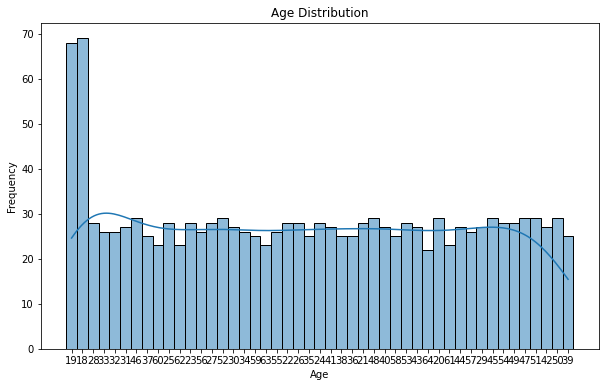

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(ages, bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Charges by Region Box Plot

Create a box plot to compare medical charges across different regions.

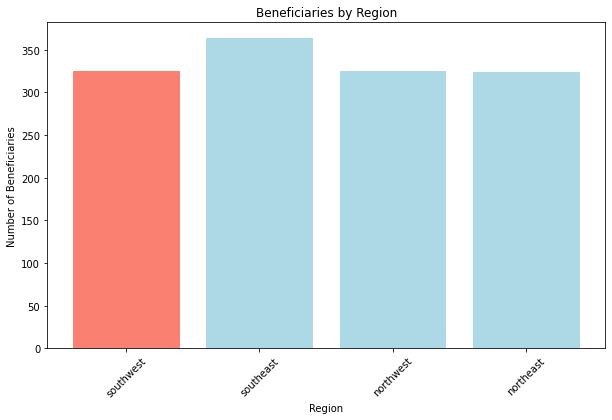

In [12]:
regions = list(region_count.keys())
counts = list(region_count.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, counts, color='lightblue')

# Highlight the bar for the region with the maximum number of beneficiaries
max_region_index = regions.index(max_name)
bars[max_region_index].set_color('salmon')
plt.title('Beneficiaries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Beneficiaries')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.show()

## BMI vs. Charges Scatter Plot

Generate a scatter plot to explore the relationship between BMI and charges, colored by smoking status.

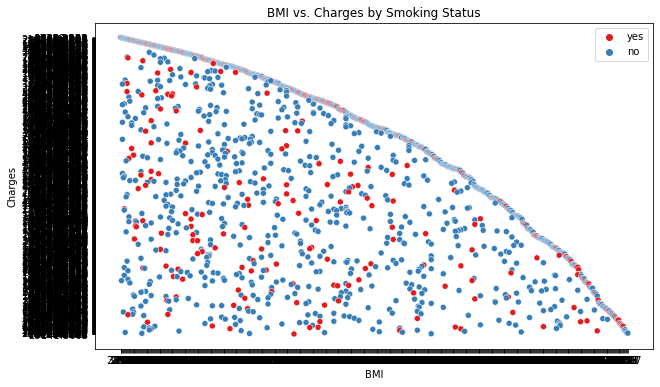

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bmis, y=insurance_charges, hue=smoker_status, palette='Set1')
plt.title('BMI vs. Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## Plotting Beneficiaries by Number of Children

This code snippet creates a bar chart showing the number of beneficiaries against the number of children they have.

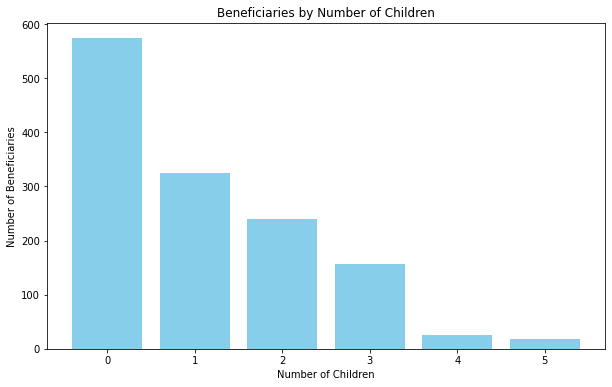

In [14]:
import matplotlib.pyplot as plt

# Data for plotting
x = list(children_counts.keys())   # Number of children
y = list(children_counts.values()) # Number of beneficiaries

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.title('Beneficiaries by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Beneficiaries')
plt.xticks(x, [str(i) for i in x])  # Ensure x-ticks are properly labeled as strings
plt.show()

## Finding the Region with the Maximum Number of Beneficiaries

This code snippet will plot the number of beneficiaries in each region, highlighting the region with the most beneficiaries.

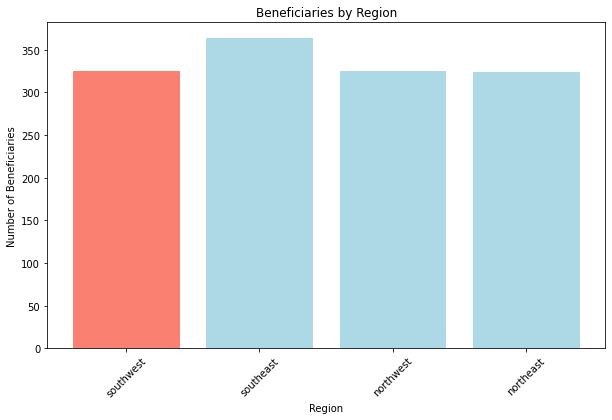

In [15]:
# Data for plotting
regions = list(region_count.keys())
counts = list(region_count.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, counts, color='lightblue')

# Highlight the bar for the region with the maximum number of beneficiaries
max_region_index = regions.index(max_name)
bars[max_region_index].set_color('salmon')
plt.title('Beneficiaries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Beneficiaries')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.show()

## To Plot the Relationship Between Smoker Status and Insurance Charges

To visualize this relationship, we can create a bar chart that compares the average insurance charges for smokers versus non-smokers.

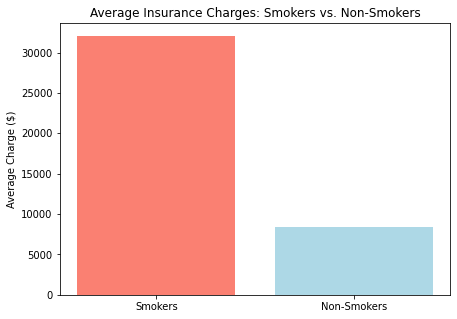

In [16]:
# Data for plotting
categories = ['Smokers', 'Non-Smokers']
charges = [average_smoker_charge, average_non_smoker_charge]

plt.figure(figsize=(7, 5))
plt.bar(categories, charges, color=['salmon', 'lightblue'])
plt.title('Average Insurance Charges: Smokers vs. Non-Smokers')
plt.ylabel('Average Charge ($)')
plt.show()